In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from glob import glob

import librosa
import librosa.display
import IPython.display as ipd

from itertools import cycle

sns.set_theme(style='white', palette=None)
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

In [3]:
audio_files = glob('./recordings/*')

In [4]:
audio_files[0]

'./recordings/6_lucas_23.wav'

In [5]:
ipd.Audio(audio_files[0])

y: [0. 0. 0. 0. 0.]
y shape: (40112,)
sr: 22050


<AxesSubplot: >

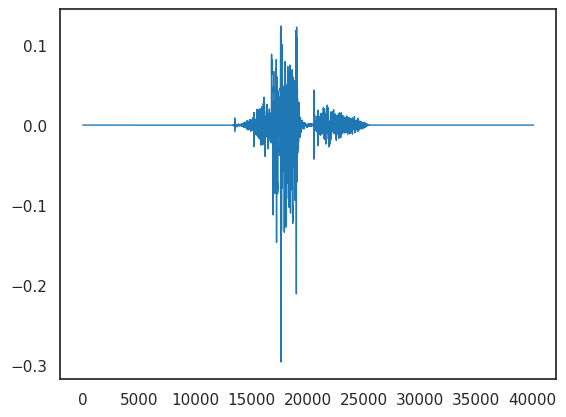

In [6]:
y, sr = librosa.load(audio_files[0])
print(f'y: {y[:5]}')
print(f'y shape: {y.shape}')
print(f'sr: {sr}')
pd.Series(y).plot(lw=1)

<AxesSubplot: >

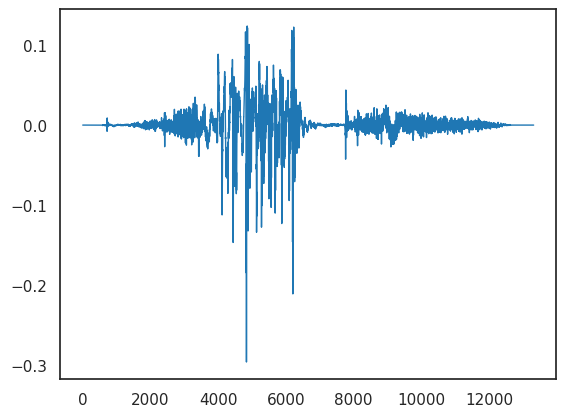

In [7]:
y_tr, index = librosa.effects.trim(y, top_db=40)
pd.Series(y_tr).plot(lw=1)

<AxesSubplot: >

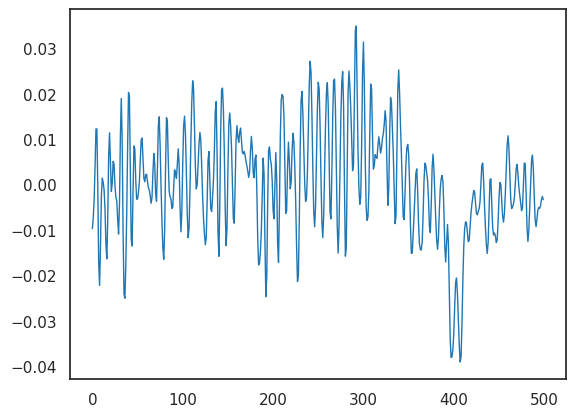

In [8]:
y_tr, index = librosa.effects.trim(y, top_db=33)
pd.Series(y_tr[2000:2500]).plot(lw=1)

Text(0.5, 1.0, 'spectrogram')

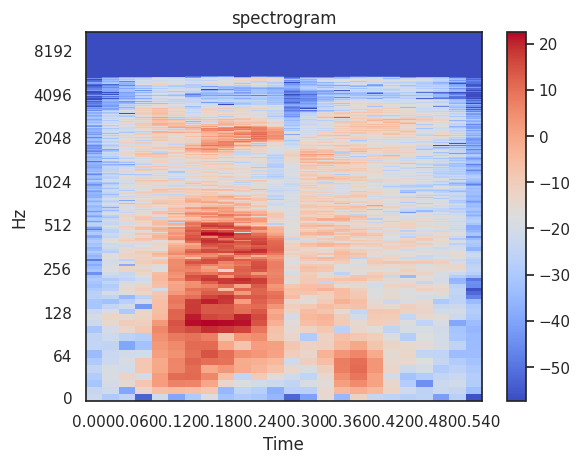

In [9]:
D = librosa.stft(y_tr)
s_db = librosa.amplitude_to_db(np.abs(D))
img = librosa.display.specshow(s_db, x_axis='time', y_axis="log")
plt.colorbar(img)
plt.title('spectrogram')

Text(0.5, 1.0, 'mel-spectrogram')

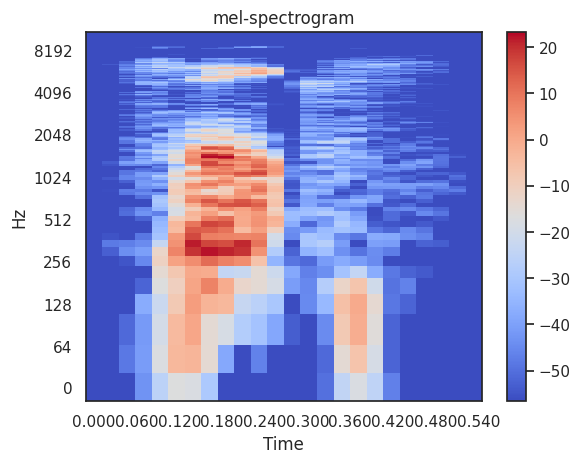

In [10]:
S = librosa.feature.melspectrogram(y=y_tr, sr=sr, n_mels=128*2)
s_db_mel = librosa.amplitude_to_db(S)
img = librosa.display.specshow(s_db_mel, x_axis='time', y_axis="log")
plt.colorbar(img)
plt.title('mel-spectrogram')

Text(0.5, 1.0, 'MFCC')

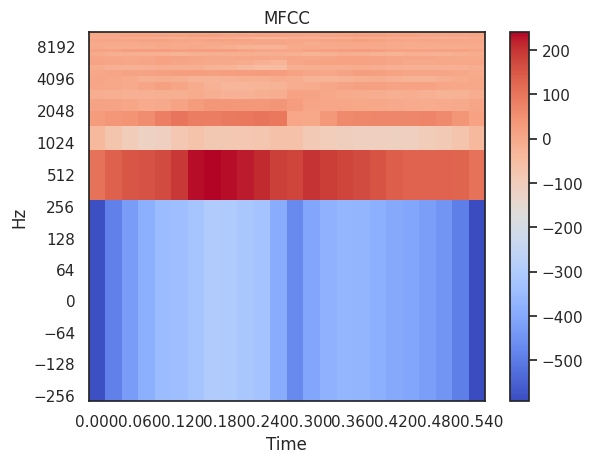

In [11]:
m = librosa.feature.mfcc(y=y_tr)
img = librosa.display.specshow(m, x_axis='time', y_axis="log")
plt.colorbar(img)
plt.title('MFCC')

Text(0.5, 1.0, 'MFCC')

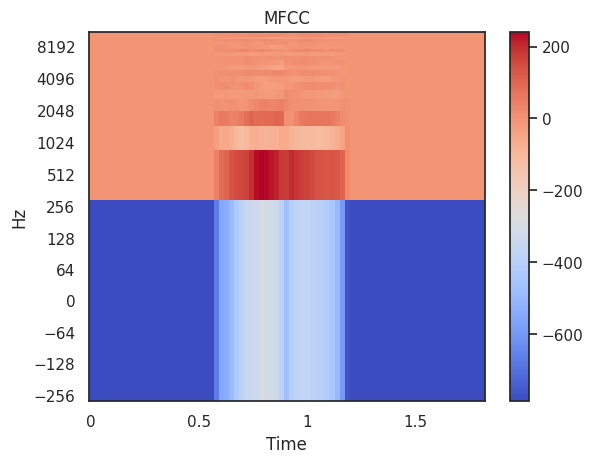

In [12]:
m = librosa.feature.mfcc(y=y)
img = librosa.display.specshow(m, x_axis='time', y_axis="log")
plt.colorbar(img)
plt.title('MFCC')

In [13]:
zc = librosa.zero_crossings(y=y)
np.sum(zc)

2145